# Principal Component Analysis (PCA)

## Overview
**Principal Component Analysis** (PCA) is the one of the most important <u>dimensionality reduction techniques</u> — techinques used to transform high-dimensional data into a lower-dimensional representation while preserving most of the original variance. It achieves that by finding the **principal components**, which are orthogonal directions capturing the maximum variance in the data. 

**PCA** leverages use of *eigenvectors* and *eigenvalues* to find the optimal lower-dimensional representation (capturing the most variance) of high-dimensional data. By computing the eigenvectors and eigenvalues of the covariance matrix of the standardized data, <u>PCA determines the directions along which the data exhibits the most significant variance</u>.

PCA is used to get deeper insights into the data

***
PCA was first introduced by Karl Pearson in 1901. Later, it was independently developed and popularized in the statistics community by Harold Hotelling in the 1930s.
***

## Implementation Steps

1. Standardize the data: Before applying PCA, it is essential to standardize the data by subtracting the mean and dividing by the standard deviation for each feature. This ensures that all features have comparable scales.
2. Compute the covariance matrix $Cov(X,X)$: The covariance matrix is calculated from the standardized data to understand the relationships between different features. It gives insights into how features vary together.
3. Calculate eigenvectors and eigenvalues of the covariance matrix
4. Sort the eigenvectors according to their eigenvalues in decreasing order
5. Choose first $k$ eigenvectors and that will be the new $k$ dimensions
6. Transform the original $n$-dimensional data points into $k$ dimensions (= Projections with dot product)
7. Transform the original $n$-dimensional data points into $k$ dimensions (= Projections with dot product)

## PCA implementation Tips
1. Make sure values are on the same scale. If not - scale them
    - Make sure the scales are close to equal otherwise results will be BIASED towards one of them.
    - <u>Standardaze the data prior to applying PCA</u>.
2. Data must be centered (not every software does it by default, so again, <u>perform Standardization</u>)
3. Number of expected principal components:
    - Technically, there is a PC for each variable in the data set. However, if there are fewer samples than variables, then the number of samples puts an upper bound on the number of Principal Components with eigenvalues greater than 0.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_iris()
iris_features = data['data']
iris_labels = data['target']
feature_names = data['feature_names']

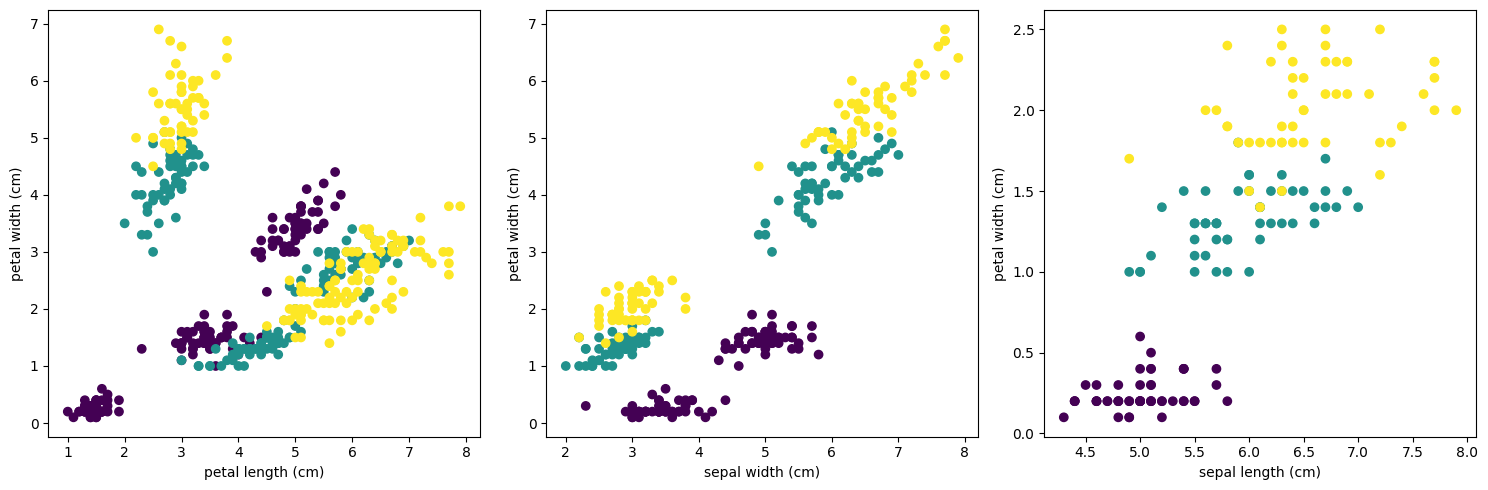

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Load the Iris dataset
data = datasets.load_iris()
iris_features = data['data']
iris_labels = data['target']

# Create 2D scatter plots for different feature combinations
plt.figure(figsize=(15, 5))
for i in range(4):
    for j in range(i+1, 4):
        plt.subplot(1, 3, j-i)
        # c=Y: This argument specifies the color for each data point based on the values in the Y variable 
        # (class labels). Each unique value in Y will be mapped to a specific color in the scatter plot.
        plt.scatter(iris_features[:, i], iris_features[:, j], c=iris_labels, cmap='viridis')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
plt.tight_layout()
plt.show()

# PCA via NumPy

In [4]:
class numpy_PCA:
    import numpy as np
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvalues = None
        self.components = None
        self.mean = None
    
    def fit(self, data):
        # perform mean centering of each row in data
        self.mean = np.mean(data, axis=0)
        data = data - self.mean 
        
        ДОБАВИТЬ СТАНДАРТИЗАЦИЮ
        
        # covariance, functions needs samples as columns, so transpose
        cov_matrix = np.cov(data.T) 
        
        # eigenvectors, eigenvalues
        self.eigenvectors, self.eigenvalues = np.linalg.eig(cov_matrix)
        
        # eigenvectors v = [:, i] column vector, transpose for easier calculations later
        self.eigenvectors = self.eigenvectors.T
        
        # sort the eigenvectors according to the eigenvalues
        idxs = np.argsort(self.eigenvalues)[::-1] # slicing for decsreasing order
        self.eigenvalues = self.eigenvalues[idxs]
        self.eigenvectors = self.eigenvectors[idxs]
        
        # save the needed k dimensions
        # >>> save first n_components, that will hopefuly account for the most variance
        # in the data
        self.components = self.eigenvectors[:self.n_components] # save first n_components
        
    def transform(self, data):
        # project data
        data = data - self.mean
        return np.dot(data, self.components.T)
    
    def plot_variance_explained(self):
        if self.eigenvalues is None:
            raise ValueError("Please call the 'fit' method first to compute the eigenvalues.")
        
        total_variance = np.sum(self.eigenvalues,axis=1)
        variance_explained = self.eigenvalues / total_variance
        
        plt.figure(figsize=(8, 6))
        plt.hist(variance_explained.flatten(), bins=10, edgecolor='black')
        plt.xlabel('Explained Variance')
        plt.ylabel('Frequency')
        plt.title('Variance Explained by Each Principal Component')
        plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA as sklearn_PCA

Shape before transformation: (150, 4)
Shape after transformation: (150, 2)


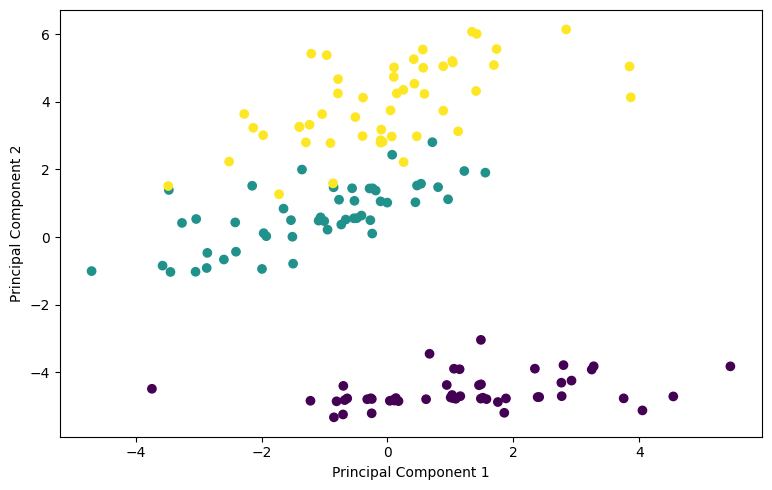

In [6]:
numpy_pca = numpy_PCA(2)
numpy_pca.fit(iris_features)
iris_features_transformed = numpy_pca.transform(iris_features)

print("Shape before transformation:", iris_features.shape)
print("Shape after transformation:", iris_features_transformed.shape)
# Create 2D scatter plots for different feature combinations
plt.figure(figsize=(15, 5))
for i in range(iris_features_transformed.shape[1]):
    for j in range(i+1, iris_features_transformed.shape[1]):
        plt.subplot(1, 2, j-i)
        # c=Y: This argument specifies the color for each data point based on the values in the Y variable 
        # (class labels). Each unique value in Y will be mapped to a specific color in the scatter plot.
        plt.scatter(iris_features_transformed[:, i], iris_features_transformed[:, j], c=iris_labels, cmap='viridis')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
plt.tight_layout()
plt.show()

# PCA via Sci-Kit Learn library

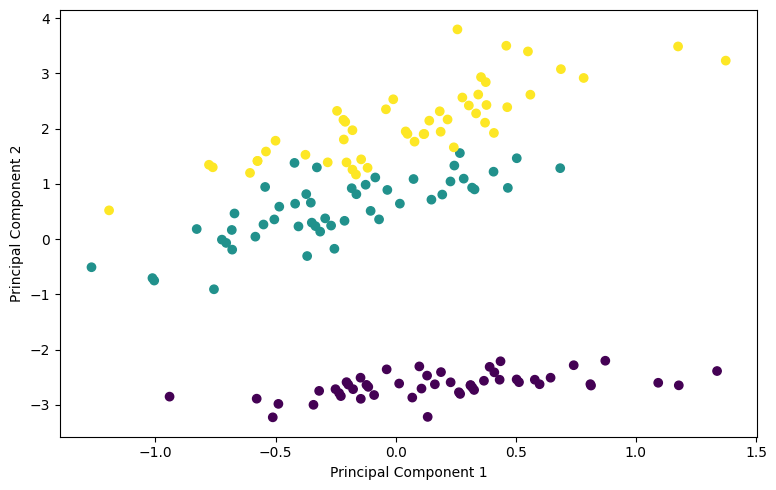

In [7]:
sklearn_pca = sklearn_PCA(2)
sklearn_pca.fit(iris_features)
iris_features_transformed = sklearn_pca.transform(iris_features)

# Create 2D scatter plots for different feature combinations
plt.figure(figsize=(15, 5))
for i in range(iris_features_transformed.shape[1]):
    for j in range(i+1, iris_features_transformed.shape[1]):
        plt.subplot(1, 2, j-i)
        # c=Y: This argument specifies the color for each data point based on the values in the Y variable 
        # (class labels). Each unique value in Y will be mapped to a specific color in the scatter plot.
        plt.scatter(iris_features_transformed[:, j], iris_features_transformed[:, i], c=iris_labels, cmap='viridis')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
plt.tight_layout()
plt.show()

# Plot the variance explained by each Principal Component

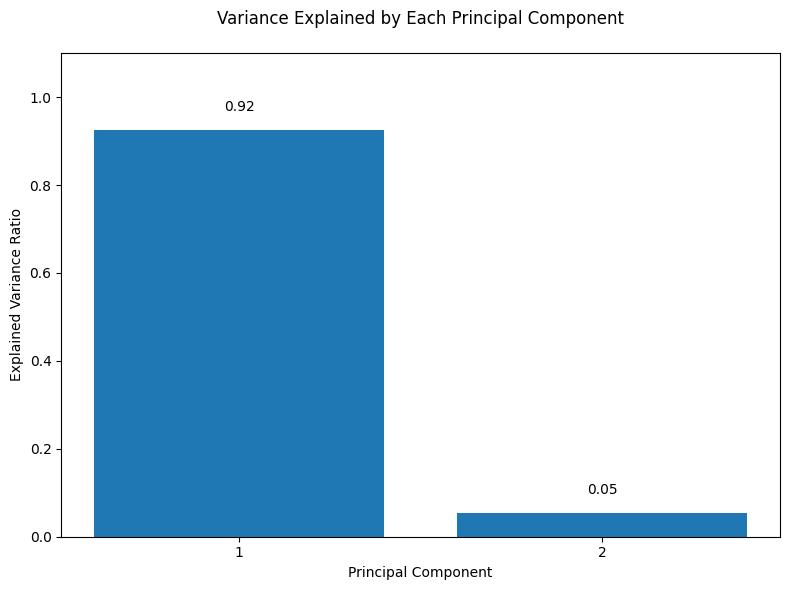

In [26]:
# Obtain the variance explained by each component
variance_explained = sklearn_pca.explained_variance_ratio_

# Plot the variance explained using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), variance_explained, align='center')
plt.title('Variance Explained by Each Principal Component\n')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks([1, 2])
plt.ylim([0, 1.1])

# Add y values for each bar on top of it
for i, value in enumerate(variance_explained):
    plt.text(i + 1, value, f'{value:.2f}\n', ha='center', va='bottom')

plt.tight_layout()
plt.show()
